In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

In [2]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos333_ativos = prceossos_ativos.merge(eventos333,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos333_ativos['Data'] = pd.to_datetime(processos333_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos333_ativos_ouro = processos333_ativos[processos333_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='first',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(processos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = processos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='first',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_333_regiao['QTAreaHA'] = join_333_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
join_333_regiao


C:\Users\User\AppData\Local\Temp\ipykernel_8376\1402799529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='first',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8376\1402799529.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]


,Unnamed: 0_x,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,...,Unnamed: 0_y,IDEvento,DTEvento,Evento_,Data,Unnamed: 0,IDMunicipio,Municipios,UF,Regiao
0,10544,815.187/2022,815187,2022,S,48066.815187/2022-24,2.0,5,11,48066.0,...,1526270,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214685,4202909,BRUSQUE,SC,Sul
2,10587,815.188/2022,815188,2022,S,48066.815188/2022-79,2.0,5,11,48066.0,...,1526692,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214744,4202909,BRUSQUE,SC,Sul
4,10630,815.189/2022,815189,2022,S,48066.815189/2022-13,2.0,5,11,48066.0,...,1527201,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214795,4202909,BRUSQUE,SC,Sul
5,56386,820.434/2007,820434,2007,S,48402.820434/2007-15,2.0,5,2,48402.0,...,2058950,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2007,271133,3523305,ITARIRI,SP,Sudeste
6,65703,820.657/2006,820657,2006,S,48402.820657/2006-93,2.0,5,2,48402.0,...,2172757,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2006,282792,3523305,ITARIRI,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,842873,806.127/2015,806127,2015,S,48422.806127/2015-95,24.0,6,22,48422.0,...,820903,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,115988,2102606,CÂNDIDO MENDES,MA,Nordeste
19040,843322,806.146/2021,806146,2021,S,48078.806146/2021-27,2.0,5,22,48078.0,...,826075,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116533,2103158,CENTRO DO GUILHERME,MA,Nordeste
19041,843502,806.155/2021,806155,2021,S,48078.806155/2021-18,2.0,5,22,48078.0,...,827764,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116744,2103158,CENTRO DO GUILHERME,MA,Nordeste
19042,843697,806.165/2021,806165,2021,S,48078.806165/2021-53,2.0,5,22,48078.0,...,829788,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116978,2103174,CENTRO NOVO DO MARANHÃO,MA,Nordeste


In [10]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos513_ativos = prceossos_ativos.merge(eventos513,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos513_ativos['Data'] = pd.to_datetime(processos513_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos513_ativos_ouro = processos513_ativos[processos513_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(processos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = processos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_513_regiao['QTAreaHA'] = join_513_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')
full_join = full_join[full_join.Data_x >= 2010]

full_join.Data_y

C:\Users\User\AppData\Local\Temp\ipykernel_8376\2159866765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8376\2159866765.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]


0       2022
1       2013
2       2020
3       2015
4       2015
        ... 
2258    1999
2259    1999
2260    1999
2261    1999
2262    2015
Name: Data_y, Length: 1940, dtype: int64

In [12]:
#Calculando Q90 
columns_keep = ['DSProcesso','QTAreaHA_x','IDEvento_x','Evento__x','Regiao_x','UF_x','Municipios_x','Data_x','QTAreaHA_y','IDEvento_y','Evento__y',
               'Data_y']
df_clean = full_join[columns_keep]
para = df_clean.query('Data_y >=2010').query('UF_x=="PA"')
mt = df_clean.query('Data_y >=2010').query('UF_x=="MT"')


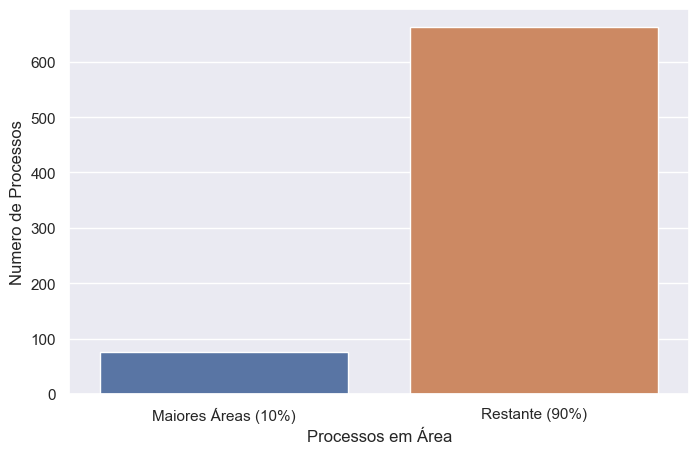

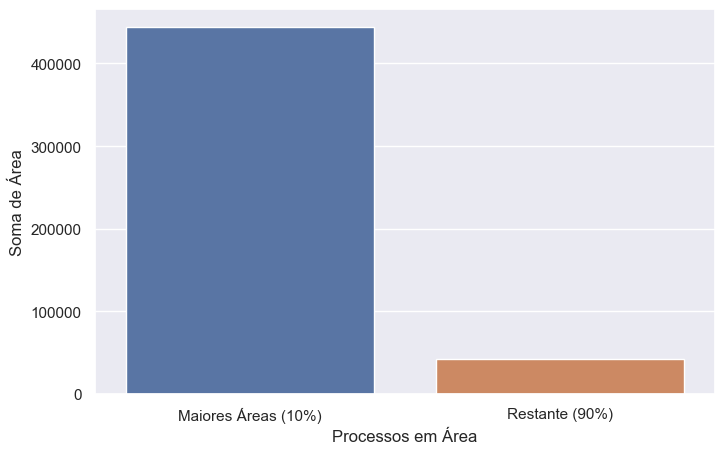

In [13]:
#Pegando os top 10%  e bottom 90% de area para processo do MT
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(mt['QTAreaHA_x'],0.90)#810.3200000000033
top10_mt = mt[mt['QTAreaHA_x'] > 810.3200000000033]
bottom_90mt = mt[mt['QTAreaHA_x'] < 810.3200000000033]
top10_mt.shape[0]
bottom_90mt.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_mt.shape[0],bottom_90mt.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_mt.QTAreaHA_x.sum(),bottom_90mt.QTAreaHA_x.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Processos em Área", y="Soma de Área")
plt.show()

In [6]:
#MT
810.3200000000033
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
bottom_90mt
top10_mt
top10x_mt= bottom_90mt.merge(a,how='inner',on='DSProcesso')
top10x_mt.drop_duplicates('DSProcesso').query('QTAreaHA_x < 810.3200000000033').groupby('Pessoa').QTAreaHA_x.sum()


Pessoa
F    28177.38
J    16661.87
Name: QTAreaHA_x, dtype: float64

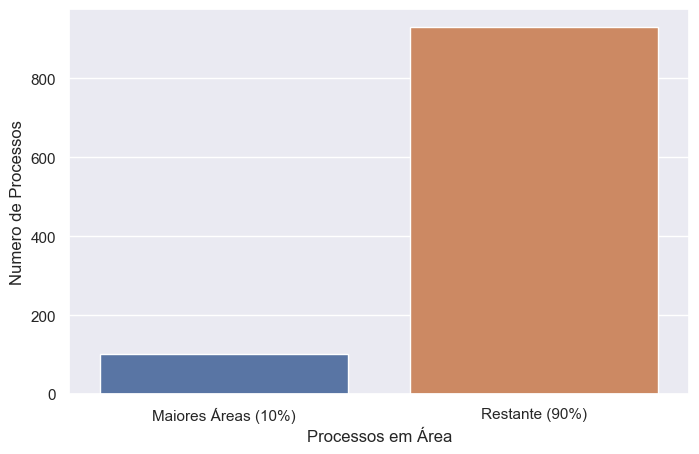

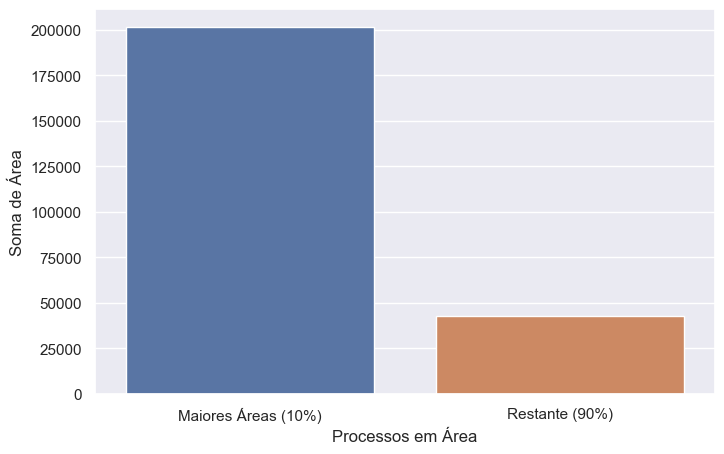

In [7]:
#Pegando os top 10%  e bottom 90% de area para processo do PA
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(para['QTAreaHA_x'],0.90)#99.33400000000022
top10_pa = para[para['QTAreaHA_x'] > 99.33400000000022]
bottom_90pa = para[para['QTAreaHA_x'] < 99.33400000000022]
top10_pa.shape[0]
bottom_90pa.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_pa.shape[0],bottom_90pa.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_pa.QTAreaHA_x.sum(),bottom_90pa.QTAreaHA_x.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Processos em Área", y="Soma de Área")
plt.show()


In [8]:
#PA
99.33400000000022
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]

top10x_pa= bottom_90pa.merge(a,how='inner',on='DSProcesso')
top10x_pa.drop_duplicates('DSProcesso').query('QTAreaHA_x < 99.33400000000022').groupby('Pessoa').Pessoa.value_counts()


Pessoa  Pessoa
F       F         902
J       J          27
Name: Pessoa, dtype: int64

## Analise Específica para o Para
- desde 19 de fevereiro de 2021; e

- com área menor ou igual a 500 hectares; e

In [9]:
#Loading packages
import pandas as pd

para = mun.query('UF=="PA"')

ouro = substancia.query('Substancia.str.contains("OURO")',engine='python')
#Filtrando no df do Para, quais são para substância ouro, baseado no DF de Ouro
para_ouro = para[para['DSProcesso'].isin(ouro['DSProcesso'])]
#Lendo a planilha de eventos e filtrando para os eventos 333 ou 513:

eventos_333 = eventos.query('IDEvento==333')
eventos_513 = eventos.query("IDEvento==513")

#Lendo a planilha principal de Processos e dando inner join com a planilha de eventos

processos_eventos_333 = processos.merge(eventos_333,how='inner',on='DSProcesso')
processos_eventos_333_513 = processos_eventos_333.merge(eventos_513,how='inner',on='DSProcesso')

#Filtrando os processo em processos_eventos_333_513 que são para o Para e para ouro
processos_eventos_333_513_para_ouro = processos_eventos_333_513[processos_eventos_333_513['DSProcesso'].isin(para_ouro['DSProcesso'])]
processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
#Lendo a planilha de Processos Pessoa e unindo ela ao nosso DF principal

processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoa,how='inner',on='DSProcesso')
processos_eventos_333_513_para_ouro_pessoa.drop_duplicates('DSProcesso',keep = 'last',inplace=True)
#Passando a coluna de Área para numérico:
processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'] = processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'].str.replace(',', '.').astype(float)
#Criando coluna de Data para o evento 513 e 333
processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_y)
processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_x)
#Selecionando as colunas que queremos:
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.loc[:,~processos_eventos_333_513_para_ouro_pessoa.columns.duplicated()].copy()
columns_keep = ['DSProcesso','BTAtivo','QTAreaHA','Tipo_Requerimento','IDEvento_x','Evento__x',
                'Evento_333_Date','IDEvento_y','Evento__y','Evento_513_Date','Pessoa','Pessoa_NOME','TipoRelacao']
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.filter(items = columns_keep).copy()
#Filtrando para os processos que o evento 513 ocorreu no dia 19 de fevereiro de 2021 ou depois
processos_data_apos = processos_eventos_333_513_para_ouro_pessoa[processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date']>= '2021-02-19']


#Filtrando para os processos que o evento 513 ocorreu antes do dia 19 de fevereiro de 2021 ou depois
processos_data_antes = processos_eventos_333_513_para_ouro_pessoa[processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date']< '2021-02-19']


C:\Users\User\AppData\Local\Temp\ipykernel_13896\4125219760.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13896\4125219760.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoa,how='inner',on='DSProcesso')


In [23]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
a = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa'],as_index=False).BTAtivo.value_counts()
a = a.sort_values('count',ascending=False)
a.groupby(['Pessoa'])['count'].sum()
processos_data_apos_500ha.query("Pessoa_NOME=='COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA'")

C:\Users\User\AppData\Local\Temp\ipykernel_13896\3223802450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


,DSProcesso,BTAtivo,QTAreaHA,Tipo_Requerimento,IDEvento_x,Evento__x,Evento_333_Date,IDEvento_y,Evento__y,Evento_513_Date,Pessoa,Pessoa_NOME,TipoRelacao
1055,850.513/2021,S,171.11,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-04-07,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-10-25,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente
3467,851.392/2021,S,145.47,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-08-24,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-03-11,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente
3473,851.393/2021,S,17.02,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-08-24,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-05-11,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente


In [30]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
b = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa'],as_index=False).QTAreaHA.sum()
b = b.sort_values('QTAreaHA',ascending=False)
b

C:\Users\User\AppData\Local\Temp\ipykernel_13896\2856905294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


,Pessoa_NOME,Pessoa,QTAreaHA
17,OURO NORTE COOPERATIVA DO GARIMPEIRO LEGAL - CGL,J,499.99
3,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,333.60
8,Coogamibra Cooperativa dos Garimpeiros e Mineradores do Brasil,J,153.12
20,Rodrigo Rodrigues de mello,F,92.70
23,diogenes alves do nascimento netto,F,50.35
15,Lucas de Barros campelo,F,50.00
1,CASSYO FERREIRA DA SILVA,F,50.00
12,JESULINO RODRIGUES DA ROCHA,F,50.00
19,ROSA MARIA CAMPOS FERREIRA,F,49.93
5,COOPERTRANS COOPERATIVA DOS GARIMPEIROS DE MORAES ALMEIDA E TRANSGARIMPEIRA,J,49.91


In [35]:
pd.set_option('display.max_colwidth', None)
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
c = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa','QTAreaHA'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).reset_index()
p = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa'],as_index=False).Pessoa_NOME.value_counts().sort_values('count',ascending=False).reset_index()
f = c.merge(p,how='inner',on='Pessoa_NOME')

d = f[['Pessoa_NOME','Pessoa_x','QTAreaHA','count']]
d.sort_values('QTAreaHA',ascending=False)
d.groupby(['Pessoa_NOME','Pessoa_x'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).QTAreaHA.sum()

C:\Users\User\AppData\Local\Temp\ipykernel_13896\1104467606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


1860.85

In [16]:
d.query('Pessoa_NOME=="COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA"')

,Pessoa_NOME,Pessoa_x,QTAreaHA,count
1,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,171.11,3
2,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,145.47,3
3,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,17.02,3


In [13]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
a = processos_data_apos_500ha.merge(mun,how='inner',on='DSProcesso')
a.drop_duplicates('DSProcesso',keep='first',inplace=True)
a.groupby(['Municipios'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).reset_index()

,index,Municipios,QTAreaHA
0,3,ITAITUBA,1394.61
1,5,RIO MARIA,196.86
2,4,NOVO PROGRESSO,153.12
3,0,ALTAMIRA,50.00
4,7,ÁGUA AZUL DO NORTE,33.43
5,1,CUMARU DO NORTE,18.56
6,6,TUCUMÃ,8.23
7,2,ELDORADO DO CARAJÁS,6.04
